In [ ]:
using LinearAlgebra, Printf, Plots#, Interact
Base.show(io::IO, f::Float64) = @printf(io, "% 12.5f", f)

In [55]:
function run( Ã, b̃, x, N; show=true)
    if show
        evals = eigen(Ã).values
        spectral_radius = maximum( abs.(evals) )
        println("\n****** Spectral Radius: $spectral_radius \n")
    end

    error = Array{Float64,1}(undef, 10)
    for i = 1:10
        x_old    = x
        x        = Ã*x_old + b̃
        error[i] = norm(x - x_old)
        if show; print( round.(x,digits=5) ); println( "   $(error[i])"); end
    end
    println()
    x,error
end

function run_sor( Ã, b̃, x, N, α; show=true)
    if show
        evals = eigen(Ã).values
        spectral_radius = maximum( abs.(evals) )
        println("\n****** Spectral Radius: $spectral_radius \n")
    end

    error = Array{Float64,1}(undef, 10)
    for i = 1:10
        x_old    = x
        x_star   = Ã*x_old + b̃
        x        = x_old + α * (x_star - x_old )
        error[i] = norm(x - x_old)
        
        if show;  print( round.(x,digits=5) ); println( "   $(error[i])"); end
    end
    if show; println(); end
    x,error
end

run_sor (generic function with 1 method)

# 1. Jacobi Method

In [16]:
A = [ 6. 2 -3; -1 3 1; 1 2 4]; b = [1;1;1]
A

3×3 Array{Float64,2}:
      6.00000       2.00000      -3.00000
     -1.00000       3.00000       1.00000
      1.00000       2.00000       4.00000

---
Let $A = S - T, $ where $S$ in chosen to be invertible

Then $A x = b \Leftrightarrow S x = T x + b \Leftrightarrow x = S^{-1} T x + S^{-1} b$

In [27]:
S = diagm(diag((A)))

T    = S - A
Sinv = inv(S)
Ã    = Sinv*T; b̃ = Sinv *b

println("12 Ã ="); Base.print_matrix( stdout, 12*Ã ); println("\n")
println("12 b̃ = $(12*b̃)" )

12 Ã =
      0.00000      -4.00000       6.00000
      4.00000       0.00000      -4.00000
     -3.00000      -6.00000       0.00000

12 b̃ = [     2.00000,      4.00000,      3.00000]



****** Spectral Radius:      0.50670 

[     0.16667,      0.33333,      0.25000]        0.44876
[     0.18056,      0.30556,      0.04167]        0.21064
[     0.08565,      0.37963,      0.05208]        0.12084
[     0.06617,      0.34452,      0.03877]        0.04230
[     0.07121,      0.34246,      0.06120]        0.02308
[     0.08311,      0.33667,      0.06096]        0.01324
[     0.08493,      0.34072,      0.06089]        0.00443
[     0.08354,      0.34135,      0.05841]        0.00291
[     0.08209,      0.34171,      0.05844]        0.00149
[     0.08198,      0.34122,      0.05862]        0.00054


*****   || A xN - b || =      0.00190



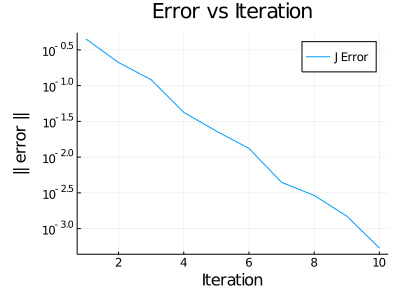

In [37]:
x = [0;0;0]
N = 10

xN, J_error = run( Ã, b̃, x, N)

println("\n*****   || A xN - b || = $(norm(A*xN - b))\n" ) 
plot(J_error, label="J Error" )
plot!(yscale=:log10, title="Error vs Iteration", xlabel="Iteration", ylabel = "|| error ||", size=(400,300) )

-----
System Need not converge!


****** Spectral Radius:      5.44949 

[     3.00000,      1.00000]        3.16228
[     8.00000,      9.00000]        9.43398
[    29.00000,     54.00000]       49.65884
[   140.00000,    300.00000]      269.88331
[   743.00000,   1641.00000]     1470.33670
[  4028.00000,   8949.00000]     8012.37100
[ 21929.00000,  48774.00000]    43663.21594
[ 119480.00000,  265800.00000]    237942.18263
[ 651083.00000,  1448481.00000]    1296663.44800
[ 3548048.00000,  7893489.00000]    7066154.14007



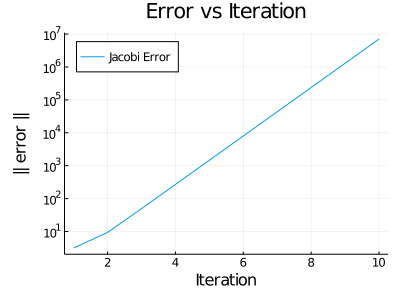

In [38]:
x,e = run([1 2; 1 5], [3;1], [0;0], 10)
plot(e, label="Jacobi Error" )
plot!(legend=:topleft, yscale=:log10, title="Error vs Iteration", xlabel="Iteration", ylabel = "|| error ||", size=(400,300) )

# 2. Gauss Seidel

In [56]:
S = LowerTriangular(A)

T    = S - A
Sinv = inv(S)
Ã    = Sinv*T; b̃ = Sinv *b

println("Ã ="); Base.print_matrix( stdout, Ã ); println("\n")
println("b̃ = $(b̃)" )

Ã =
      0.00000      -0.33333       0.50000
      0.00000      -0.11111      -0.16667
      0.00000       0.13889      -0.04167

b̃ = [     0.16667,      0.38889,      0.01389]



****** Spectral Radius:      0.16667 

[     0.16667,      0.38889,      0.01389]        0.42333
[     0.04398,      0.34336,      0.06732]        0.14135
[     0.08587,      0.33952,      0.05877]        0.04293
[     0.08288,      0.34137,      0.05860]        0.00352
[     0.08217,      0.34119,      0.05886]        0.00077
[     0.08237,      0.34117,      0.05882]        0.00020
[     0.08236,      0.34118,      0.05882]        0.00001
[     0.08235,      0.34118,      0.05882]        0.00000
[     0.08235,      0.34118,      0.05882]        0.00000
[     0.08235,      0.34118,      0.05882]        0.00000


*****   || A xN - b || =      0.00000



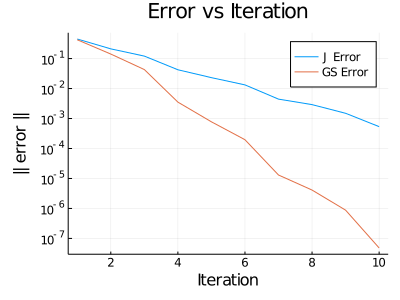

In [57]:
x = [0;0;0]
N = 10

xN,GS_error = run( Ã, b̃, x, N)

println("\n*****   || A xN - b || = $(norm(A*xN - b))\n" ) 

plot( J_error, label="J  Error")
plot!(GS_error, label="GS Error" )
plot!(yscale=:log10, title="Error vs Iteration", xlabel="Iteration", ylabel = "|| error ||", size=(400,300) )

# 3. Successive Overrelaxation (SOR)

In [59]:
S = LowerTriangular(A)

T    = S - A
Sinv = inv(S)
Ã    = Sinv*T; b̃ = Sinv *b

println("Ã ="); Base.print_matrix( stdout, Ã ); println("\n")
println("b̃ = $(b̃)" )

Ã =
      0.00000      -0.33333       0.50000
      0.00000      -0.11111      -0.16667
      0.00000       0.13889      -0.04167

b̃ = [     0.16667,      0.38889,      0.01389]



****** Spectral Radius:      0.16667 

[     0.15000,      0.35000,      0.01250]        0.38099
[     0.06562,      0.34812,      0.05703]        0.09542
[     0.07779,      0.34145,      0.05958]        0.01411
[     0.08216,      0.34106,      0.05890]        0.00444
[     0.08240,      0.34116,      0.05881]        0.00028
[     0.08236,      0.34118,      0.05882]        0.00005
[     0.08235,      0.34118,      0.05882]        0.00001
[     0.08235,      0.34118,      0.05882]        0.00000
[     0.08235,      0.34118,      0.05882]        0.00000
[     0.08235,      0.34118,      0.05882]        0.00000


*****   || A xN - b || =      0.00000



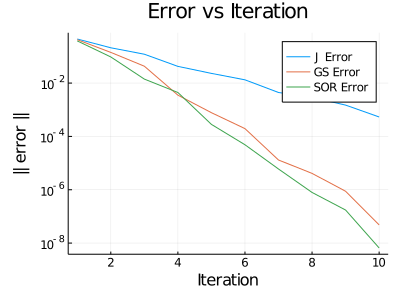

In [66]:
x = [0;0;0]
N = 10

xN,SOR_error = run_sor( Ã, b̃, x, N, 0.9)

println("\n*****   || A xN - b || = $(norm(A*xN - b))\n" ) 

plot( J_error,   label="J  Error")
plot!(GS_error,  label="GS Error" )
plot!(SOR_error, label="SOR Error" )

plot!(yscale=:log10, title="Error vs Iteration", xlabel="Iteration", ylabel = "|| error ||", size=(400,300) )

In [ ]:
using Interact
@manipulate for α in range(0.01, stop=2, length = 21)
    xN,SOR_error = run_sor( Ã, b̃, x, N, α; show=false)
    plot( J_error,   label="J  Error")
    plot!(GS_error,  label="GS Error" )
    plot!(SOR_error, label="SOR Error" )

    plot!(yscale=:log10, title="Error vs Iteration", xlabel="Iteration", ylabel = "|| error ||", size=(400,300) )
end